# Hypergeometric sampling resembles nested hypergeometric sampling

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### simulations

In [27]:
N = 10000
p1 = 0.1
p2 = 0.5

In [28]:
data = np.random.choice(['A' for i in range(1000)] + ['E'], size=N)

In [29]:
vals, counts = np.unique(data, return_counts=True)

In [30]:
counts

array([9989,   11])

In [ ]:
N_total = []
N_sequential = []
for trial in range(100000):
    N_total.append(stats.hypergeom.rvs(N, counts[-1], int(N*p1*p2)))
    temp = stats.hypergeom.rvs(N, counts[-1], int(N*p1))
    N_sequential.append(stats.hypergeom.rvs(int(N*p1), temp, int(N*p1*p2)))

In [31]:
N_total = []
N_sequential = []
for trial in range(100000):
    N_total.append(stats.hypergeom.rvs(N, counts[-1], int(N*p1*p2)))
    temp = stats.hypergeom.rvs(N, counts[-1], int(N*p1))
    N_sequential.append(stats.binom.rvs(temp, p2))

In [32]:
# N_total = []
# N_sequential = []
# for trial in range(100000):
#     N_total.append(stats.binom.rvs(N, p1*p2))
#     N_sequential.append(stats.binom.rvs(stats.binom.rvs(N, p1), p2))

In [33]:
print(np.array(N_total).mean(), np.array(N_sequential).mean())
print(np.array(N_total).var(), np.array(N_sequential).var())

0.55018 0.5496
0.5211019676 0.52043984


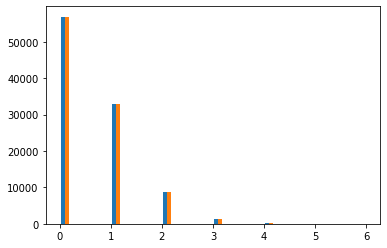

In [34]:
plt.hist([N_total,N_sequential], bins=30);
